## Cryptocurrency Project
Learning goal: By the end of this Capstone, you should be familiar with some of the ways to visually and numberically explore the data stored in a DataFrame.  In doing this we will use the cryptocurrency price data.  

When examining a new data set, we start with high-level information about what the dataset holds. We will look at the some of the more standard ways to investigate the data and then move on to the specific ways that we can look at financial data.  

Let's start by using cryptocurrency price data and begin to dig in.

1. Introduction to the data science process
2. Gaining insights into data
  - Context for the data
  -	The Exploratory Process
  -	Understanding variables
  -	Exploring types, missing data and descriptive statistics
3. Developing analytics
4. Opertunities for Further Investigations


TODO include approved finance warning.

## 1. Introduction to the data science process

Earlier in this section we discussed using methods such as DataFrame.info, DataFrame.head, and DataFrame.tail to examine some aspects of a DataFrame. While these methods are critical, they are on their own often insufficient to get enough information to know how to approach a new dataset. This is where exploratory statistics and visualizations for datasets come in.

TODO link to THE DS process on docs.microsoft

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing as pr
import matplotlib.pyplot as plt
from scipy.signal import correlate
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_pacf

## 2. Gaining insights into data

### Context for the data
These are price data files showing the daily prices of several cryptocurrencies, priced in US$.  We will investigate this data to get a feel for the data science process and ask questions that might lead us to have opinions about the relatvie performance of investments in these cryptocurrencies.   

When we need to load data from multiple similar files with unknown formatting, it is often good to test out the pattern with a single file first.  Unfortunately this is a very common situation for a data scientist.

In [2]:
crypto = pd.read_csv("Data/cryptocurrencypricehistory/dash_price.csv")
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1468 non-null   object 
 1   Open        1468 non-null   float64
 2   High        1468 non-null   float64
 3   Low         1468 non-null   float64
 4   Close       1468 non-null   float64
 5   Volume      1468 non-null   object 
 6   Market Cap  1468 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.4+ KB


If you need a refresher on pandas info(), please see TODO [LINK TO URL REPLACING](Data_Science_1/Full_Day/3-Pandas-Reference.ipynb).  Now we can see that there are dates in the column "Date", which would make a good datetime index.  Volume and Market Cap seem to have issues with what we expect to be numbers.  
Try looking at the head to see if the formatting is surprising or if it might be a missing value symbol

In [3]:
crypto.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",728.99,738.74,685.04,685.04,"126,208,000","5,754,970,000"
1,"Feb 19, 2018",687.70,731.11,687.22,728.73,"89,328,600","5,427,640,000"
2,"Feb 18, 2018",744.09,747.42,673.57,689.28,"96,752,600","5,871,020,000"
3,"Feb 17, 2018",699.13,748.89,693.64,742.16,"116,106,000","5,515,090,000"
4,"Feb 16, 2018",702.53,722.02,684.28,698.86,"100,343,000","5,540,570,000"


So it looks like one issue is that the numbers are written with commas. We cannot be certain that there are not other issues, but let's take care of this one and see how it goes.

In [4]:
crypto = pd.read_csv("Data/cryptocurrencypricehistory/dash_price.csv", parse_dates=["Date"], thousands=",")
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1468 non-null   datetime64[ns]
 1   Open        1468 non-null   float64       
 2   High        1468 non-null   float64       
 3   Low         1468 non-null   float64       
 4   Close       1468 non-null   float64       
 5   Volume      1468 non-null   int64         
 6   Market Cap  1468 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 80.4 KB


Well that seems to have taken care of it!  

Question: What kind of data sturcture have we just created?

In [5]:
# TODO MOVE to instructor version
# Instructor Answer: 

print(type(crypto))

<class 'pandas.core.frame.DataFrame'>


Now we have a data modeling issue. We have multiple files each with a different cryptocurrency inside it. Our crypto variable is a ___, as you just learned. But it would be hard to cleanly hold multiple cryptocurrencies data columns in one dataframe. There are several different options as to how to arrange this data and you may not know the right one until you get further along in your data science exploration process.  This is part of the iterative nature of data science! 

Let's try making a dictionary of dataframes, which is a common first way to start.  Let's also assume that the data input process that worked for one file will work for the other files.  Then we need to check. 

In [6]:
crypto = {} 
crypto['bitcoin'] = pd.read_csv('Data/cryptocurrencypricehistory/bitcoin_price.csv', parse_dates=["Date"], thousands=",")
crypto['dash'] =  pd.read_csv("Data/cryptocurrencypricehistory/dash_price.csv", parse_dates=["Date"], thousands=",")
crypto['ethereum'] = pd.read_csv("Data/cryptocurrencypricehistory/ethereum_price.csv", parse_dates=["Date"], thousands=",")
crypto['litecoin'] = pd.read_csv("Data/cryptocurrencypricehistory/litecoin_price.csv", parse_dates=["Date"], thousands=",")
crypto['monero'] = pd.read_csv("Data/cryptocurrencypricehistory/monero_price.csv", parse_dates=["Date"], thousands=",")
crypto['nem'] = pd.read_csv("Data/cryptocurrencypricehistory/nem_price.csv", parse_dates=["Date"], thousands=",")
crypto['neo'] = pd.read_csv("Data/cryptocurrencypricehistory/neo_price.csv", parse_dates=["Date"], thousands=",")
crypto['ripple'] = pd.read_csv("Data/cryptocurrencypricehistory/ripple_price.csv", parse_dates=["Date"], thousands=",")
crypto['stratis'] = pd.read_csv("Data/cryptocurrencypricehistory/stratis_price.csv", parse_dates=["Date"], thousands=",")
crypto['waves'] = pd.read_csv("Data/cryptocurrencypricehistory/waves_price.csv", parse_dates=["Date"], thousands=",")

for k in crypto.keys():
    print(k)
    print(crypto[k].info())

bitcoin
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1760 non-null   datetime64[ns]
 1   Open        1760 non-null   float64       
 2   High        1760 non-null   float64       
 3   Low         1760 non-null   float64       
 4   Close       1760 non-null   float64       
 5   Volume      1760 non-null   object        
 6   Market Cap  1760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 96.4+ KB
None
dash
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1468 non-null   datetime64[ns]
 1   Open        1468 non-null   float64       
 2   High        1468 non-null   float64       
 3   Low        

It seems that there are still problems in our volume and market cap data.  

#### Thought question: 
What is our clue in the above output?

Let's investigate. 

In [7]:
crypto['waves']['Market Cap']

0      810,038,000
1      753,733,000
2      784,044,000
3      788,332,000
4      800,093,000
          ...     
624              -
625              -
626              -
627              -
628              -
Name: Market Cap, Length: 629, dtype: object

In [8]:
crypto['waves']['Market Cap'][628]

'-'

Hey so it seems, we have found a nonstandard NaN value.  Try a few more.

In [9]:
crypto['neo']['Market Cap']

0      8,966,490,000
1      8,270,290,000
2      8,866,100,000
3      8,516,620,000
4      7,996,380,000
           ...      
525                -
526                -
527                -
528                -
529                -
Name: Market Cap, Length: 530, dtype: object

In [10]:
crypto['bitcoin']['Volume'].value_counts() #We can use value_counts to identify the '-' as NaN issue

-                243
351,969,000        1
6,783,120,000      1
12,364,100         1
148,737,000        1
                ... 
2,569,530,000      1
222,185,000        1
25,187,100         1
31,985,400         1
27,445,500         1
Name: Volume, Length: 1518, dtype: int64

In [11]:
crypto = {} 
crypto['bitcoin'] = pd.read_csv('Data/cryptocurrencypricehistory/bitcoin_price.csv', index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['dash'] =  pd.read_csv("Data/cryptocurrencypricehistory/dash_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['ethereum'] = pd.read_csv("Data/cryptocurrencypricehistory/ethereum_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['litecoin'] = pd.read_csv("Data/cryptocurrencypricehistory/litecoin_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['monero'] = pd.read_csv("Data/cryptocurrencypricehistory/monero_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['nem'] = pd.read_csv("Data/cryptocurrencypricehistory/nem_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['neo'] = pd.read_csv("Data/cryptocurrencypricehistory/neo_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['ripple'] = pd.read_csv("Data/cryptocurrencypricehistory/ripple_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['stratis'] = pd.read_csv("Data/cryptocurrencypricehistory/stratis_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['waves'] = pd.read_csv("Data/cryptocurrencypricehistory/waves_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()

for k in crypto.keys():
    print(k)
    print(crypto[k].info())
    print(crypto[k].head())

bitcoin
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2013-04-28 to 2018-02-20
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1760 non-null   float64
 1   High        1760 non-null   float64
 2   Low         1760 non-null   float64
 3   Close       1760 non-null   float64
 4   Volume      1517 non-null   float64
 5   Market Cap  1760 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.2 KB
None
              Open    High     Low   Close  Volume  Market Cap
Date                                                          
2013-04-28  135.30  135.98  132.10  134.21     NaN  1500520000
2013-04-29  134.44  147.49  134.00  144.54     NaN  1491160000
2013-04-30  144.00  146.93  134.05  139.00     NaN  1597780000
2013-05-01  139.00  139.89  107.72  116.99     NaN  1542820000
2013-05-02  116.38  125.60   92.28  105.21     NaN  1292190000
dash
<class 'pandas.core.frame.DataFrame'>


Hooray, we have found the unexpected wrinkles of the encodings of this data source.  Hopefully, this is all, but we may find more as we go along.  It is part of the iterative nature of data exploration.  

While the Volume and Market Cap are inconsistent types, a mix of int64 and float64, python can process this as we go along. 

In [12]:
#TODO outline header

In [13]:
# For this analysis I will only be looking at closing price to make things more manageable
for coin in crypto:
    sns.lineplot(x='Date', y='Close', data=crypto[coin])
    plt.title("Crypto prices over time")
    

ValueError: Could not interpret input 'Date'

This may be a little bit hard to read. Since we will be principly working with close data, generate a Close dataframe.

In [14]:

for coin in crypto:
    fig, ax = plt.subplots(figsize=(6,4))
    sns.lineplot(y='Close', x='Date',data=crypto[coin], alpha=0.8, ax=ax) 
    plt.xlabel('Date', fontsize=12)
    plt.xticks(rotation=20)
    plt.ylabel('Price in USD', fontsize=12)
    title_str = "Closing price distribution of " + coin
    plt.title(title_str, fontsize=15)
    plt.show()

ValueError: Could not interpret input 'Date'

### Exercise: 
This is still not a great visualization. I'm sure you could do a whole lot better. Take a look at the Seaborn or Matplotlib galleries and try to better represent the cryptocurrency price data.

Consider using faceting or aesthetic properties such as color to improve this.  

#### Thought question: 
As you consider your chart, what is the most important thing that you want to communicate? Is it the different timelines, the different price values, or perhaps something else?  Perhaps you want to use another visualization property to show something else, such as what the trading volume is at each data point?

### Daily Returns

As you can see up above, the higher price of bitcoin makes it look substantially different assets. But is there a way in which it might be similar? One way that we can compare different assets, is by shifting from prices to daily returns.  Because, after all, if we were to use \$100 to buy Bitcoin and \$100 to buy another coin like Ripple the daily return would affect how much each is now worth, not the price directly.  

In [15]:
# Daily Reuturn or Percent Change
for coin in crypto:
    crypto[coin]['DailyReturn'] = crypto[coin]['Close'].pct_change().fillna(0)

In [16]:
fig, ax = plt.subplots(figsize=(14,10))
for coin in crypto:
    sns.lineplot(x=crypto[coin].Date, y=crypto[coin]['DailyReturn'], label=coin, alpha=0.4)
plt.legend(loc=2)
plt.title('Daily Returns of Closing Prices')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Date'

Without going too far into the statistics, we can see that the daily returns are more likely to be stationary then prices are. By stationary we roughly mean that they do not have a trend that wanders off in a predictable direction.  If you are interested in learning more about stationarity, you may wish to look into the Reactor on Pairs Trading or look [here](https://en.wikipedia.org/wiki/Stationary_process)

Next let's look into the correlations of coin returns.  Correlation is a statistic that goes between -1 and 1, that describes how returns move together.  You can find more information on [Correlation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html)

But in order to do that, let's limit our analysis to dates that have all coins.  To go further back the meanings of correlations over different time periods get problematic.  

#### Extension question: 
For those interested in statistics, why would it be problematic to consider correlations from different historical time periods?

In [17]:
# make a data set with common dates
overlap = 1000000 # we have less than 1,000,000 days in our data frame
for coin in crypto:
    overlap = min(overlap, len(crypto[coin].Close))
    print(coin, len(crypto[coin].Close))
print(f"Minimum overlap is {overlap}")

bitcoin 1760
dash 1468
ethereum 929
litecoin 1760
monero 1371
nem 1057
neo 530
ripple 1662
stratis 558
waves 629
Minimum overlap is 530


In [18]:
rets = pd.DataFrame()
for coin in crypto:
    rets[coin] = crypto[coin].tail(overlap).DailyReturn

In [19]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 530 entries, 2016-09-09 to 2018-02-20
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bitcoin   530 non-null    float64
 1   dash      530 non-null    float64
 2   ethereum  530 non-null    float64
 3   litecoin  530 non-null    float64
 4   monero    530 non-null    float64
 5   nem       530 non-null    float64
 6   neo       530 non-null    float64
 7   ripple    530 non-null    float64
 8   stratis   530 non-null    float64
 9   waves     530 non-null    float64
dtypes: float64(10)
memory usage: 45.5 KB


In [20]:
correl = rets.corr(method='pearson')
correl

,bitcoin,dash,ethereum,litecoin,monero,nem,neo,ripple,stratis,waves
bitcoin,1.000000,0.370482,0.405018,0.447405,0.443103,0.256335,0.248041,0.168285,0.386489,0.500768
dash,0.370482,1.000000,0.421020,0.327946,0.517193,0.273844,0.230297,0.080933,0.310008,0.347569
ethereum,0.405018,0.421020,1.000000,0.376341,0.471287,0.329257,0.277608,0.168177,0.370922,0.432683
litecoin,0.447405,0.327946,0.376341,1.000000,0.379845,0.324241,0.264719,0.245333,0.309997,0.400146
monero,0.443103,0.517193,0.471287,0.379845,1.000000,0.311374,0.143716,0.188208,0.423707,0.445880
nem,0.256335,0.273844,0.329257,0.324241,0.311374,1.000000,0.189041,0.203854,0.303288,0.301198
neo,0.248041,0.230297,0.277608,0.264719,0.143716,0.189041,1.000000,0.095924,0.211811,0.280715
ripple,0.168285,0.080933,0.168177,0.245333,0.188208,0.203854,0.095924,1.000000,0.165534,0.168818
stratis,0.386489,0.310008,0.370922,0.309997,0.423707,0.303288,0.211811,0.165534,1.000000,0.455423
waves,0.500768,0.347569,0.432683,0.400146,0.445880,0.301198,0.280715,0.168818,0.455423,1.000000


While the above matrix shows us some things, such as all these coins are positively correlated, it is not easy to read.  Let's use a heatmap to guide our thinking.  

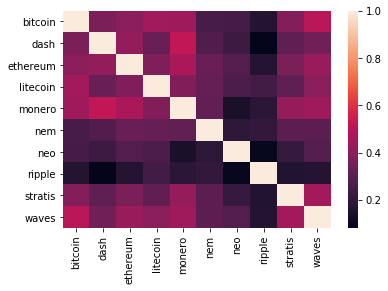

In [21]:
sns.heatmap(correl)

#### Questions
Which of these coins is least correlated with the others, and why do you think so?  There is no absolute right answer. 

#### Extension Questions
As you have time, answer these questions or formulate your own.

1. Which of these coins has the highest average daily return over this period?
2. Is that return fairly steady or is their a lot of volatility of returns?  
3. Are all coins equally volatile?  What is their range of standard deviations?
4. Which coin and time period has the [maximum drawdown](https://en.wikipedia.org/wiki/Drawdown_(economics\))?
5. Could you lessen that drawdown by investing in a blend or portfolio of coins?

### References for the curious:
1. The original [bitcoin whitepaper](https://bitcoin.org/bitcoin.pdf).  It is not the easiest reading.
2. An overview of the cryptocurrency ecosystem: https://coinmarketcap.com/
3. A Microsoft blockchain [implementation](https://azure.microsoft.com/en-us/free/blockchain/)